In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file_path = '/content/drive/My Drive/BTC-USD.csv'

In [16]:
import pandas as pd

# Read the CSV file from Google Drive
df = pd.read_csv('/content/drive/My Drive/BTC-USD.csv')

# Display the first 5 rows of the dataset
print(df.head())

# Check the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Display detailed information about the dataset
print("\nDetailed information about the dataset:")
print(df.info())

# Show basic statistical information about the dataset
print("\nBasic statistical information:")
print(df.describe())


         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
Number of rows and columns: (3634, 7)

Detailed information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3634 non-null   object 
 1   Open       3634 non-null   float64
 2   High       3634 non-null   float64
 3   Low        3634 non-null   float64
 4   Close      3634 non-nul

Training data shape: (2901, 5, 1), Training labels shape: (2901,)
Testing data shape: (721, 5, 1), Testing labels shape: (721,)
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8876e-05 - val_loss: 0.0012
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7980e-05 - val_loss: 0.0011
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.7930e-05 - val_loss: 0.0011
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4756e-05 - val_loss: 0.0011
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6021e-05 - val_loss: 9.8323e-04
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6162e-05 - val_loss: 0.0028
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0828e-05 - val_loss: 0.0018
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3462e-05 - val_loss: 9.2571e-04
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5122e-05 - val_loss: 9.2394e-04
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1268e-05 - val_loss: 8.8249e-04
Epoch 12/100
73/73 

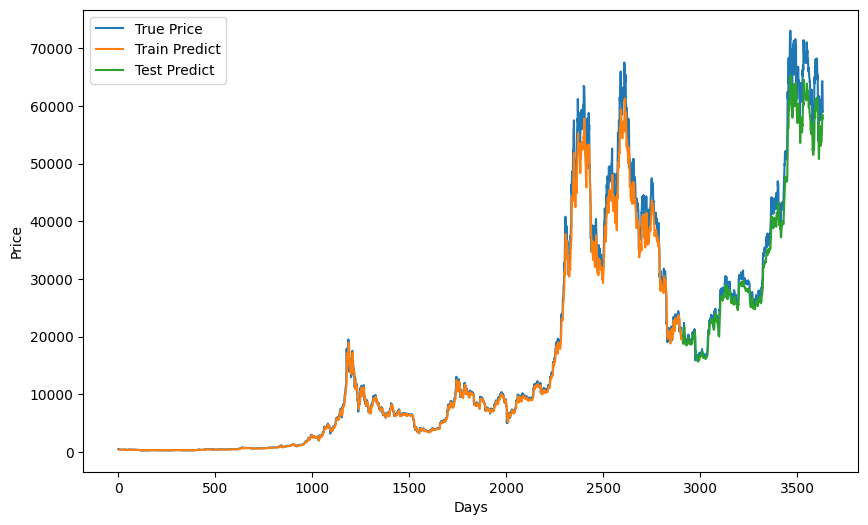

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

# Read data
file_path = '/content/drive/My Drive/BTC-USD.csv'
df = pd.read_csv(file_path)

# Select the 'Close' price for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:]

# Create dataset for LSTM input
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5  # Use the past 5 days' data to predict the next day's value
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape data for LSTM input: [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))  # Add 1D Convolutional Layer
model.add(MaxPooling1D(pool_size=2))  # Add MaxPooling Layer
model.add(Flatten())  # Flatten the input for the Dense layer
model.add(Dense(50, activation='relu'))  # Add Dense Layer with ReLU activation
model.add(Dense(1))  # Output Layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model and save training history with early stopping
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stop])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Visualize the results
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='True Price')
plt.plot(range(look_back, look_back + len(train_predict)), train_predict[:,0], label='Train Predict')
plt.plot(range(len(train_predict) + (2 * look_back) + 1, len(train_predict) + (2 * look_back) + 1 + len(test_predict)), test_predict[:,0], label='Test Predict')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
